In [2]:
import pandas as pd
import numpy as np
from seaborn import plt
import seaborn as sns
from patsy import dmatrices
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#from imblearn.under_sampling import OneSidedSelection
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import classification_report
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
import xgboost as xgb

pd.options.display.max_rows = 999
pd.options.display.max_columns = 110
%matplotlib inline

/Users/stephenchou/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/stephenchou/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [344]:
df = pd.read_pickle('merged_football_data_update.pkl')

In [109]:

df = pd.read_pickle('merged_football_data_update.pkl')
y, X = dmatrices('firstround ~ year + C(pos)+ C(college) + height + weight + C(pos):forty + C(pos):vertical + C(pos):bench + C(pos):broad + C(pos):threecone + C(pos):shuttle + games +completions + attempts + pass_yards + pass_ints + pass_tds + rec_yards + rec_td + receptions + rush_att + rush_yds + rush_td + solo_tackles + tackles + loss_tackles + ast_tackles + fum_forced + fum_rec + fum_tds + fum_yds + sacks + int + int_tds + int_yds + pd', df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.4, 
                                                     random_state=0)
X_train = X_train.drop('year', 1)
X_test = X_test.drop('year', 1)
y_train = y_train['firstround']
y_test = y_test['firstround']
featureNames = X_train.columns
featureNames2 = featureNames.str.strip().str.replace('[', '_').str.replace(']', '_')
dtrain = xgb.DMatrix( X_train.values, feature_names = featureNames2, label=y_train.values)
dtest = xgb.DMatrix( X_test.values, feature_names = featureNames2, label=y_test.values)

In [348]:
featureNames = X_train.columns
featureNames2 = featureNames.str.strip().str.replace('[', '_').str.replace(']', '_')
X_train.columns=featureNames2


gbm = xgb.XGBClassifier()

gbm_params = {
    'learning_rate': [.02, .05, .11],
    'n_estimators': [200, 400, 500],
    'max_depth': [4,5,6],
    'scale_pos_weight': [6,7,8]
}

kappa_scorer = make_scorer(cohen_kappa_score)

cv = StratifiedKFold(y_train)
grid = GridSearchCV(gbm, gbm_params,cv=cv,verbose=10,scoring=kappa_scorer)

grid.fit(X_train, y_train)
print (grid.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=6 
[CV]  learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=6, score=0.223336 -   1.0s
[CV] learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=6, score=0.244100 -   1.0s
[CV] learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=6 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.9s remaining:    0.0s


[CV]  learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=6, score=0.240559 -   0.9s
[CV] learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=7 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.9s remaining:    0.0s


[CV]  learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=7, score=0.203926 -   0.9s
[CV] learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=7 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV]  learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=7, score=0.247622 -   0.9s
[CV] learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=7 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.7s remaining:    0.0s


[CV]  learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=7, score=0.203196 -   0.9s
[CV] learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=8 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.6s remaining:    0.0s


[CV]  learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=8, score=0.204200 -   0.9s
[CV] learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=8 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.5s remaining:    0.0s


[CV]  learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=8, score=0.210620 -   0.9s
[CV] learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=8 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.5s remaining:    0.0s


[CV]  learning_rate=0.02, max_depth=4, n_estimators=200, scale_pos_weight=8, score=0.224414 -   0.9s
[CV] learning_rate=0.02, max_depth=4, n_estimators=400, scale_pos_weight=6 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.4s remaining:    0.0s


[CV]  learning_rate=0.02, max_depth=4, n_estimators=400, scale_pos_weight=6, score=0.283057 -   1.8s
[CV] learning_rate=0.02, max_depth=4, n_estimators=400, scale_pos_weight=6 
[CV]  learning_rate=0.02, max_depth=4, n_estimators=400, scale_pos_weight=6, score=0.240818 -   1.8s
[CV] learning_rate=0.02, max_depth=4, n_estimators=400, scale_pos_weight=6 
[CV]  learning_rate=0.02, max_depth=4, n_estimators=400, scale_pos_weight=6, score=0.279817 -   2.0s
[CV] learning_rate=0.02, max_depth=4, n_estimators=400, scale_pos_weight=7 
[CV]  learning_rate=0.02, max_depth=4, n_estimators=400, scale_pos_weight=7, score=0.258790 -   2.6s
[CV] learning_rate=0.02, max_depth=4, n_estimators=400, scale_pos_weight=7 
[CV]  learning_rate=0.02, max_depth=4, n_estimators=400, scale_pos_weight=7, score=0.244086 -   2.1s
[CV] learning_rate=0.02, max_depth=4, n_estimators=400, scale_pos_weight=7 
[CV]  learning_rate=0.02, max_depth=4, n_estimators=400, scale_pos_weight=7, score=0.245904 -   2.2s
[CV] learning_

[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed: 10.2min finished


{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 400, 'scale_pos_weight': 7}


In [110]:
param = {'max_depth':5, 'eta':.05, 'silent':1, 'scale_pos_weight':7, 'objective':'binary:logistic' }
num_round = 400
param['eval_metric'] = 'logloss'
evallist  = [(dtest,'eval'), (dtrain,'train')]
plst = param.items()

bst = xgb.train( plst, dtrain, num_round, evallist)
#make prediction

[0]	eval-logloss:0.68287	train-logloss:0.680102
[1]	eval-logloss:0.67348	train-logloss:0.668047
[2]	eval-logloss:0.665606	train-logloss:0.657364
[3]	eval-logloss:0.65792	train-logloss:0.647495
[4]	eval-logloss:0.651164	train-logloss:0.637635
[5]	eval-logloss:0.644018	train-logloss:0.628527
[6]	eval-logloss:0.638433	train-logloss:0.621031
[7]	eval-logloss:0.633618	train-logloss:0.614636
[8]	eval-logloss:0.628151	train-logloss:0.607061
[9]	eval-logloss:0.622821	train-logloss:0.599494
[10]	eval-logloss:0.618763	train-logloss:0.59426
[11]	eval-logloss:0.613828	train-logloss:0.588048
[12]	eval-logloss:0.609641	train-logloss:0.582082
[13]	eval-logloss:0.606391	train-logloss:0.57775
[14]	eval-logloss:0.602437	train-logloss:0.572618
[15]	eval-logloss:0.598683	train-logloss:0.568386
[16]	eval-logloss:0.59522	train-logloss:0.563873
[17]	eval-logloss:0.592883	train-logloss:0.560491
[18]	eval-logloss:0.589768	train-logloss:0.55549
[19]	eval-logloss:0.587061	train-logloss:0.552429
[20]	eval-logloss

In [112]:
preds = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)
print(classification_report(y_test,(preds>.5).astype(int),target_names=['not first round','first round']))

                 precision    recall  f1-score   support

not first round       0.93      0.87      0.90      1671
    first round       0.31      0.46      0.37       216

    avg / total       0.85      0.82      0.84      1887



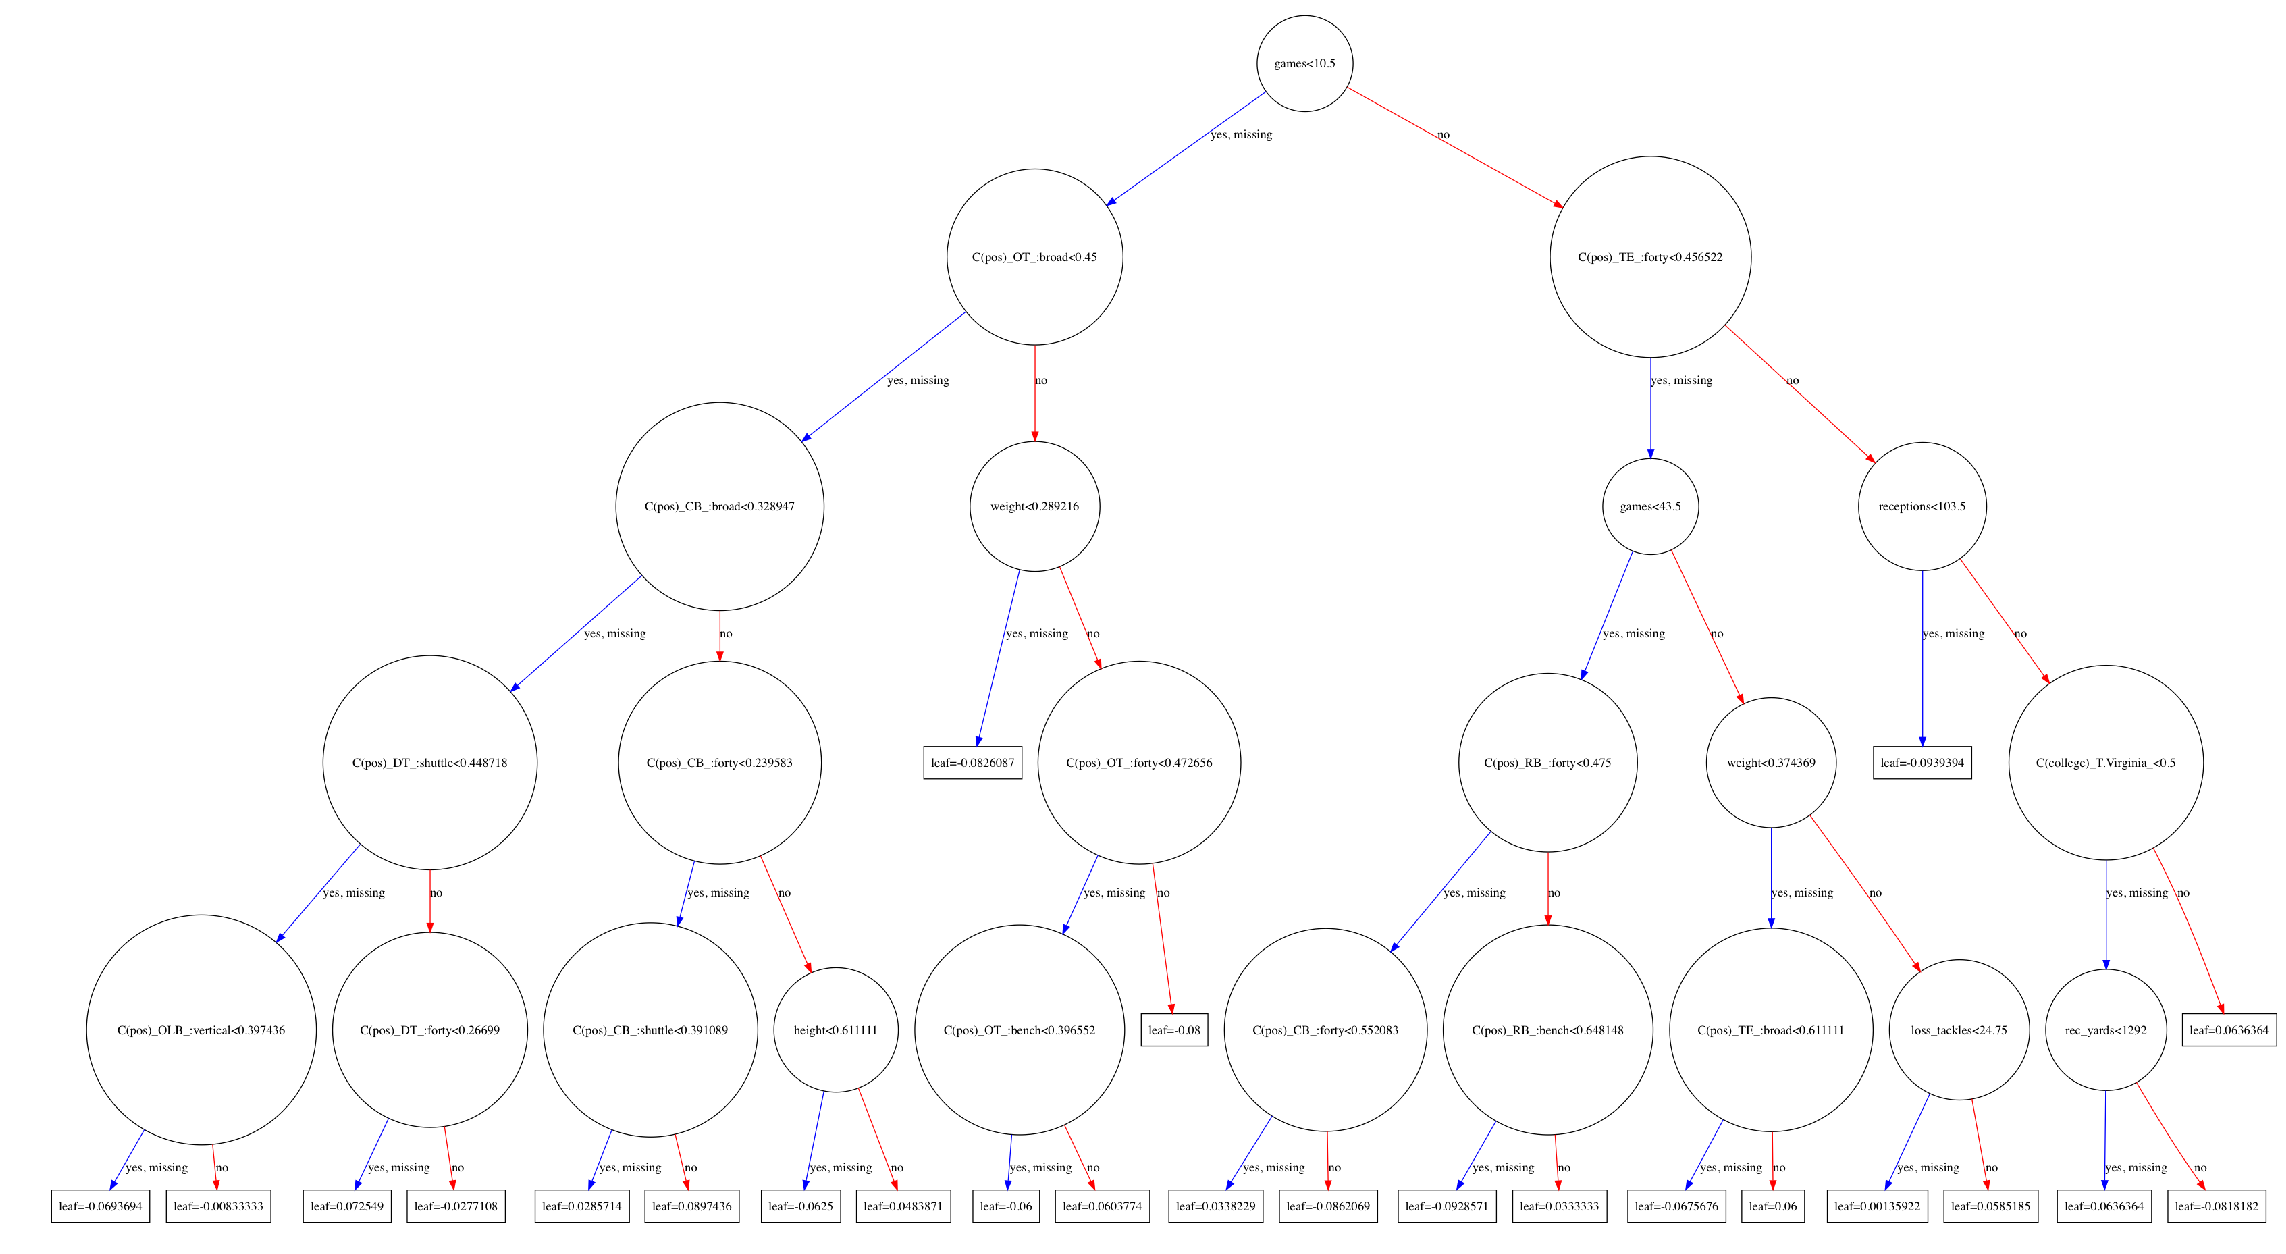

In [113]:
import graphviz

xgb.plot_tree(bst)
fig = plt.gcf()
fig.set_size_inches(40, 30)

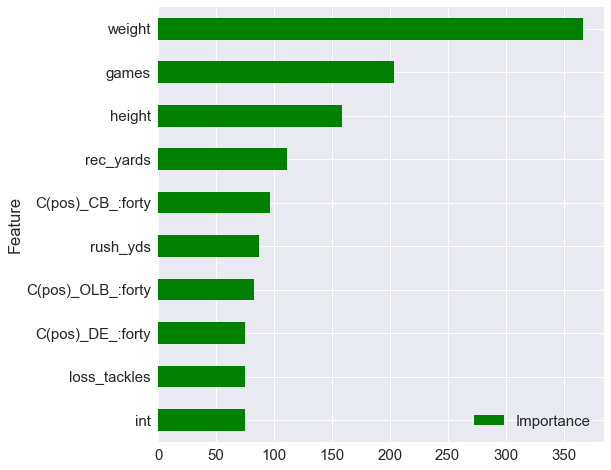

In [115]:
importances = bst.get_fscore()
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame[-10:].plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'green')

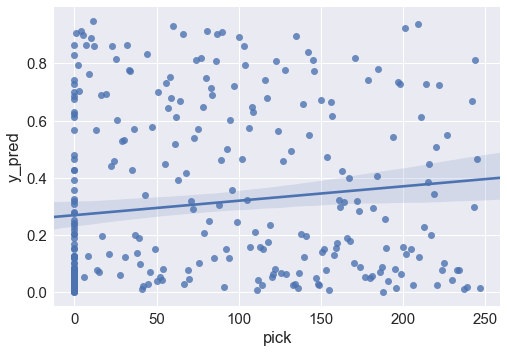

In [116]:
ax = sns.regplot(x="pick", y="y_pred", data=test2)

# Logistic Regression

In [3]:
df = pd.read_pickle('merged_football_data_norm_update.pkl')

In [4]:
y, X = dmatrices('firstround ~ college_r + C(pos)+ C(pos):height + C(pos):weight + C(pos):forty + C(pos):vertical + C(pos):bench + C(pos):broad + C(pos):threecone + C(pos):shuttle + games +completions + attempts + pass_yards + pass_ints + pass_tds + rec_yards + rec_td + receptions + rush_att + rush_yds + rush_td + solo_tackles + tackles + loss_tackles + ast_tackles + fum_forced + fum_rec + fum_tds + fum_yds + sacks + int + int_tds + int_yds + pd', df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size=0.4, 
                                                     random_state=0)

In [5]:
logreg = LogisticRegression(C=100000,class_weight='balanced')
logreg.fit(X_train,y_train)

/Users/stephenchou/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [6]:
y_pred = logreg.predict_proba(X_test)
featureNames = X_train.columns
featureNames2 = featureNames.str.strip().str.replace('[', '_').str.replace(']', '_')

In [7]:
d = {'Feature_names':featureNames2,
     'Betas':logreg.coef_[0]}
pd.DataFrame(d)

,Betas,Feature_names
0,-2.800817,Intercept
1,3.589053,C(pos)_T.CB_
2,7.525823,C(pos)_T.DE_
3,2.073552,C(pos)_T.DT_
4,-3.015479,C(pos)_T.FB_
5,9.387990,C(pos)_T.FS_
6,8.402064,C(pos)_T.ILB_
7,-10.193095,C(pos)_T.K_
8,-2.494950,C(pos)_T.LS_
9,3.457420,C(pos)_T.OG_


In [9]:
featureNames = X_train.columns
featureNames2 = featureNames.str.strip().str.replace('[', '_').str.replace(']', '_')
logreg.coef_

array([[ -2.80081739,   3.58905328,   7.52582315,   2.07355188,
         -3.01547856,   9.38799048,   8.40206392, -10.19309519,
         -2.49494993,   3.45741974,   5.72452922,   5.84339917,
         -3.08505036, -12.49669761,  -1.68179218,  11.22154112,
         -4.43367359,   1.04768077,   0.92929271,   3.07937715,
          3.20314971,   0.14994201,   0.81263899,  -0.58013738,
         -5.50562683,  -1.32090518,  -3.70609357,  -0.91925465,
          1.54885701,  -0.59037899,   0.95268171,  -0.60541496,
          3.73914469,   2.31269462,  -2.33846172,   1.44103323,
          4.48525059,   7.27049518,   3.17963394,   6.31718578,
          3.03200842,  -0.66807717,   8.0012544 ,   0.40677009,
         34.02666555,  -0.9538163 ,   0.48695238,   5.17968445,
          2.82357294,  -0.25599631,   4.829476  ,   8.19127406,
          3.0371    ,   0.60233666,   6.20316911,  -7.0710436 ,
         -8.38996231, -10.17762322,  -1.25452926,  -0.84666176,
         -6.80963139,  -8.2219895 , -16.

In [10]:
model = SelectFromModel(logreg, threshold='median')
model.fit(X_train, y_train)

/Users/stephenchou/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectFromModel(estimator=LogisticRegression(C=100000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
        prefit=False, threshold='median')

In [11]:
X_train.columns[model.get_support()]

Index(['Intercept', 'C(pos)[T.CB]', 'C(pos)[T.DE]', 'C(pos)[T.DT]',
       'C(pos)[T.FB]', 'C(pos)[T.FS]', 'C(pos)[T.ILB]', 'C(pos)[T.K]',
       'C(pos)[T.LS]', 'C(pos)[T.OG]', 'C(pos)[T.OLB]', 'C(pos)[T.OT]',
       'C(pos)[T.P]', 'C(pos)[T.QB]', 'C(pos)[T.SS]', 'C(pos)[T.TE]',
       'C(pos)[C]:height', 'C(pos)[CB]:height', 'C(pos)[FS]:height',
       'C(pos)[K]:height', 'C(pos)[QB]:height', 'C(pos)[RB]:height',
       'C(pos)[SS]:height', 'C(pos)[WR]:height', 'C(pos)[C]:weight',
       'C(pos)[CB]:weight', 'C(pos)[DE]:weight', 'C(pos)[DT]:weight',
       'C(pos)[FS]:weight', 'C(pos)[K]:weight', 'C(pos)[OLB]:weight',
       'C(pos)[OT]:weight', 'C(pos)[QB]:weight', 'C(pos)[RB]:weight',
       'C(pos)[SS]:weight', 'C(pos)[WR]:weight', 'C(pos)[C]:forty',
       'C(pos)[CB]:forty', 'C(pos)[DE]:forty', 'C(pos)[FS]:forty',
       'C(pos)[ILB]:forty', 'C(pos)[K]:forty', 'C(pos)[OLB]:forty',
       'C(pos)[OT]:forty', 'C(pos)[RB]:forty', 'C(pos)[SS]:forty',
       'C(pos)[TE]:forty', 'C(po

In [12]:
y_pred2 = logreg.predict(X_test)

In [13]:
print(classification_report(y_test,(y_pred2).astype(int),target_names=['not first round','first round']))

                 precision    recall  f1-score   support

not first round       0.94      0.77      0.85      1671
    first round       0.26      0.63      0.37       216

    avg / total       0.86      0.75      0.79      1887



In [159]:
# Now I have important features from logistic regression, plug into xgboost

# XGBoost with reduced amount of features

In [160]:
df = pd.read_pickle('merged_football_data_update.pkl')
y, X = dmatrices('firstround ~ year + college_r + C(pos)+ C(pos):height + C(pos):weight + C(pos):forty + C(pos):vertical + C(pos):bench + C(pos):broad + C(pos):threecone + C(pos):shuttle + games +completions + attempts + pass_yards + pass_ints + pass_tds + rec_yards + rec_td + receptions + rush_att + rush_yds + rush_td + solo_tackles + tackles + loss_tackles + ast_tackles + fum_forced + fum_rec + fum_tds + fum_yds + sacks + int + int_tds + int_yds + pd', df, return_type="dataframe")

year = 2017

year2 = 2012
X_train = X[X['year']<year2]
X_test = X[(X['year']<year) & (X['year']>=year2)]
X_predict = X[(X['year']==year)]
X_train = X_train.drop('year', 1)
X_test = X_test.drop('year', 1)
X_predict = X_predict.drop('year', 1)

y_train = df['firstround'][df['year']<year2]
y_test = df['firstround'][(df['year']>=year2)&(df['year']<year)]
y_predict = df['firstround'][df['year']==year]


X_train_new = X_train.iloc[:,model.get_support()]
X_test_new = X_test.iloc[:,model.get_support()]
X_predict_new = X_predict.iloc[:,model.get_support()]

featureNames = X_train.columns[model.get_support()]
featureNames2 = featureNames.str.strip().str.replace('[', '_').str.replace(']', '_')
X_train_new.columns=featureNames2

dtrain = xgb.DMatrix( X_train_new.values, feature_names = featureNames2, label=y_train.values)
dtest = xgb.DMatrix( X_test_new.values, feature_names = featureNames2, label=y_test.values)
dpredict = xgb.DMatrix( X_predict_new.values, feature_names = featureNames2, label=y_predict.values)



In [375]:
gbm = xgb.XGBClassifier()

gbm_params = {
    'learning_rate': [.07,.09,.11,.13],
    'n_estimators': [1200,1500,2000],
    'max_depth': [2,3,4],
    'scale_pos_weight': [7,8,9]
}

kappa_scorer = make_scorer(cohen_kappa_score)

cv = StratifiedKFold(y_train)
grid = GridSearchCV(gbm, gbm_params,cv=cv,verbose=10,scoring=kappa_scorer)

grid.fit(X_train_new, y_train)
print (grid.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=7 
[CV]  learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=7, score=0.272639 -   1.2s
[CV] learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=7 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=7, score=0.182889 -   1.2s
[CV] learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=7 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV]  learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=7, score=0.193457 -   1.2s
[CV] learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=8 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s remaining:    0.0s


[CV]  learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=8, score=0.270723 -   1.2s
[CV] learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=8 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.8s remaining:    0.0s


[CV]  learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=8, score=0.188830 -   1.2s
[CV] learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=8 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.9s remaining:    0.0s


[CV]  learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=8, score=0.177754 -   1.2s
[CV] learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=9 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.1s remaining:    0.0s


[CV]  learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=9, score=0.276855 -   1.2s
[CV] learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=9 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.3s remaining:    0.0s


[CV]  learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=9, score=0.184410 -   1.2s
[CV] learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=9 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.5s remaining:    0.0s


[CV]  learning_rate=0.07, max_depth=2, n_estimators=1200, scale_pos_weight=9, score=0.199670 -   1.2s
[CV] learning_rate=0.07, max_depth=2, n_estimators=1500, scale_pos_weight=7 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.6s remaining:    0.0s


[CV]  learning_rate=0.07, max_depth=2, n_estimators=1500, scale_pos_weight=7, score=0.283992 -   1.5s
[CV] learning_rate=0.07, max_depth=2, n_estimators=1500, scale_pos_weight=7 
[CV]  learning_rate=0.07, max_depth=2, n_estimators=1500, scale_pos_weight=7, score=0.207347 -   1.4s
[CV] learning_rate=0.07, max_depth=2, n_estimators=1500, scale_pos_weight=7 
[CV]  learning_rate=0.07, max_depth=2, n_estimators=1500, scale_pos_weight=7, score=0.180357 -   1.5s
[CV] learning_rate=0.07, max_depth=2, n_estimators=1500, scale_pos_weight=8 
[CV]  learning_rate=0.07, max_depth=2, n_estimators=1500, scale_pos_weight=8, score=0.295871 -   1.5s
[CV] learning_rate=0.07, max_depth=2, n_estimators=1500, scale_pos_weight=8 
[CV]  learning_rate=0.07, max_depth=2, n_estimators=1500, scale_pos_weight=8, score=0.197132 -   1.4s
[CV] learning_rate=0.07, max_depth=2, n_estimators=1500, scale_pos_weight=8 
[CV]  learning_rate=0.07, max_depth=2, n_estimators=1500, scale_pos_weight=8, score=0.192323 -   1.5s
[CV

[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed: 12.1min finished


{'learning_rate': 0.09, 'max_depth': 2, 'n_estimators': 1200, 'scale_pos_weight': 8}


In [161]:
param = {'max_depth':2, 'eta':.09, 'silent':1, 'scale_pos_weight':8, 'objective':'binary:logistic' }
num_round = 1200
param['eval_metric'] = 'logloss'
evallist  = [(dtest,'eval'), (dtrain,'train')]
plst = param.items()

bst = xgb.train(plst, dtrain, num_round, evallist)

[0]	eval-logloss:0.699212	train-logloss:0.695648
[1]	eval-logloss:0.70103	train-logloss:0.696886
[2]	eval-logloss:0.705739	train-logloss:0.698129
[3]	eval-logloss:0.709566	train-logloss:0.699988
[4]	eval-logloss:0.710519	train-logloss:0.70057
[5]	eval-logloss:0.712647	train-logloss:0.701816
[6]	eval-logloss:0.716114	train-logloss:0.702037
[7]	eval-logloss:0.718617	train-logloss:0.703303
[8]	eval-logloss:0.718719	train-logloss:0.70321
[9]	eval-logloss:0.718683	train-logloss:0.70295
[10]	eval-logloss:0.720016	train-logloss:0.702878
[11]	eval-logloss:0.721011	train-logloss:0.703383
[12]	eval-logloss:0.720388	train-logloss:0.702752
[13]	eval-logloss:0.721222	train-logloss:0.70221
[14]	eval-logloss:0.720636	train-logloss:0.701504
[15]	eval-logloss:0.722594	train-logloss:0.70039
[16]	eval-logloss:0.723237	train-logloss:0.700399
[17]	eval-logloss:0.722603	train-logloss:0.699471
[18]	eval-logloss:0.720674	train-logloss:0.697221
[19]	eval-logloss:0.720346	train-logloss:0.696646
[20]	eval-loglos

In [162]:
preds = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)
print(classification_report(y_test,(preds>.5).astype(int),target_names=['not first round','first round']))


                 precision    recall  f1-score   support

not first round       0.95      0.75      0.84      1324
    first round       0.23      0.62      0.33       153

    avg / total       0.87      0.74      0.79      1477



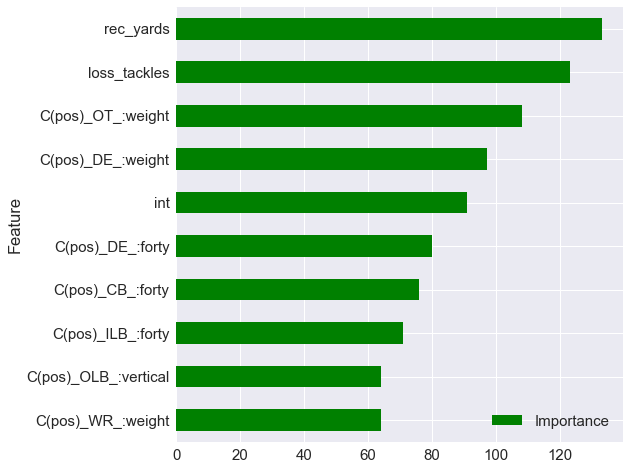

In [163]:
importances = bst.get_fscore()
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame[-10:].plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'green')

In [164]:
out= df[(X['year']<year) & (X['year']>=year2)]
out['y_pred'] = preds
test = out[['player','drafted','pos','y_pred','firstround']].sort_values('y_pred',ascending=False)

/Users/stephenchou/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [166]:
test.head(32)

,player,drafted,pos,y_pred,firstround
3201,E.J. Manuel,Buffalo Bills / 1st / 16th pick /,QB,0.985769,0.0
2983,Michael Floyd,Arizona Cardinals / 1st / 13th pick /,WR,0.980293,1.0
4125,Paxton Lynch,Denver Broncos / 1st / 26th pick /,QB,0.974400,1.0
3506,Logan Thomas,Arizona Cardinals / 4th / 120th pick /,QB,0.974400,0.0
3521,Blake Bortles,Jacksonville Jaguars / 1st / 3rd pick /,QB,0.973785,1.0
3564,Jordan Matthews,Philadelphia Eagles / 2nd / 42nd pick /,WR,0.962552,0.0
4265,Dean Lowry,Green Bay Packers / 4th / 137th pick /,DE,0.961185,0.0
3268,Aaron Dobson,New England Patriots / 2nd / 59th pick /,WR,0.948597,0.0
2925,Nick Foles,Philadelphia Eagles / 3rd / 88th pick /,QB,0.945391,0.0
3162,Josh Robinson,Minnesota Vikings / 3rd / 66th pick /,CB,0.944316,0.0


In [167]:
test[test['firstround']==1]

,player,drafted,pos,y_pred,firstround
2983,Michael Floyd,Arizona Cardinals / 1st / 13th pick /,WR,0.980293,1.0
4125,Paxton Lynch,Denver Broncos / 1st / 26th pick /,QB,0.974400,1.0
3521,Blake Bortles,Jacksonville Jaguars / 1st / 3rd pick /,QB,0.973785,1.0
3873,DeVante Parker,Miami Dolphins / 1st / 14th pick /,WR,0.933388,1.0
3745,Khalil Mack,Oakland Raiders / 1st / 5th pick /,OLB,0.925661,1.0
3068,Nick Perry,Green Bay Packers / 1st / 28th pick /,DE,0.917508,1.0
3692,Jadeveon Clowney,Houston Texans / 1st / 1st pick /,DE,0.907462,1.0
3070,Chandler Jones,New England Patriots / 1st / 21st pick /,DE,0.906855,1.0
3615,Eric Ebron,Detroit Lions / 1st / 10th pick /,TE,0.899602,1.0
3801,Justin Gilbert,Cleveland Browns / 1st / 8th pick /,CB,0.883472,1.0


In [168]:
preds2 = bst.predict(dpredict,ntree_limit=bst.best_ntree_limit)
out2= df[X['year']==year]
out2['y_pred'] = preds2
#out[['player','drafted','y_pred']][out['firstround']==1]
test2 = out2[['player','pick','pos','y_pred','firstround']].sort_values('y_pred',ascending=False)
test2['pick_pred']=test2.y_pred.rank(ascending=False)
print(classification_report(y_predict,(preds2>.5).astype(int),target_names=['not first round','first round']))

test2.head(32)

                 precision    recall  f1-score   support

not first round       0.96      0.74      0.84       297
    first round       0.20      0.66      0.31        29

    avg / total       0.89      0.74      0.79       326



/Users/stephenchou/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,player,pick,pos,y_pred,firstround,pick_pred
4688,Marshon Lattimore,11.0,CB,0.950132,1.0,1.0
4447,Robert Davis,209.0,WR,0.936824,0.0,2.0
4674,Chidobe Awuzie,60.0,CB,0.931773,0.0,3.0
4501,Bucky Hodges,201.0,TE,0.924873,0.0,4.0
4414,Leonard Fournette,4.0,RB,0.914630,1.0,5.0
4692,Fabian Moreau,81.0,CB,0.911852,0.0,6.0
4680,Shaquill Griffin,90.0,CB,0.909005,0.0,7.0
4570,Myles Garrett,1.0,DE,0.905325,1.0,8.0
4705,Ahkello Witherspoon,66.0,CB,0.903039,0.0,9.0
4405,Davis Webb,87.0,QB,0.902757,0.0,10.0


In [169]:
test2[test2['firstround']==1]

,player,pick,pos,y_pred,firstround,pick_pred
4688,Marshon Lattimore,11.0,CB,0.950132,1.0,1.0
4414,Leonard Fournette,4.0,RB,0.914630,1.0,5.0
4570,Myles Garrett,1.0,DE,0.905325,1.0,8.0
4446,Corey Davis,5.0,WR,0.899387,1.0,11.0
4399,Patrick Mahomes,10.0,QB,0.887790,1.0,14.0
4527,Ryan Ramczyk,32.0,OT,0.865792,1.0,15.5
4491,Mike Williams,7.0,WR,0.864214,1.0,17.0
4404,Deshaun Watson,12.0,QB,0.860908,1.0,18.0
4498,Evan Engram,23.0,TE,0.860070,1.0,20.0
4659,Jabrill Peppers,25.0,SS,0.816478,1.0,26.0


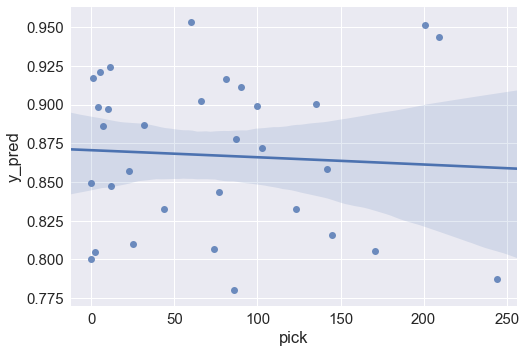

In [170]:
ax = sns.regplot(x="pick", y="y_pred", data=test2.head(32),logistic=True, n_boot=500, y_jitter=.03)

In [171]:
test3 = test2[['player','pos','pick','pick_pred']][test2['pick']>0].sort_values('pick',ascending=True)

In [172]:
test3.head(10)

,player,pos,pick,pick_pred
4570,Myles Garrett,DE,1.0,8.0
4403,Mitchell Trubisky,QB,2.0,32.5
4585,Solomon Thomas,DE,3.0,53.0
4414,Leonard Fournette,RB,4.0,5.0
4446,Corey Davis,WR,5.0,11.0
4648,Jamal Adams,SS,6.0,234.0
4491,Mike Williams,WR,7.0,17.0
4424,Christian McCaffrey,RB,8.0,181.0
4476,John Ross,WR,9.0,39.0
4399,Patrick Mahomes,QB,10.0,14.0
